In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
from pprint import pprint
import csv
import gmaps
import datetime

In [3]:
datafile = "final_merge_data.csv"
datafile_df = pd.read_csv(datafile, encoding="utf-8")

datafile_df.head()

,Park,Year,Month,Temp,Lat,Lng,Visits
0,Acadia National Park,2009,1,21.501818,44.338556,-68.273335,9366
1,Acadia National Park,2009,2,28.770000,44.338556,-68.273335,9751
2,Acadia National Park,2009,3,32.956000,44.338556,-68.273335,19258
3,Acadia National Park,2009,4,45.278000,44.338556,-68.273335,59277
4,Acadia National Park,2009,5,54.897273,44.338556,-68.273335,129885


In [40]:
grouped_month_df = datafile_df.groupby(['Park', 'Month'])
grouped_year_df = datafile_df.groupby(['Park','Year'])

print(grouped_month_df)
print(grouped_year_df)

# In order to be visualized, a data function must be used...

grouped_month_df.count().head(12)

Year  Temp  Lat  Lng  Visits
Park                 Month                              
Acadia National Park 1        10    10   10   10      10
                     2        10    10   10   10      10
                     3        10    10   10   10      10
                     4        10    10   10   10      10
                     5        10    10   10   10      10
                     6        10    10   10   10      10
                     7        10    10   10   10      10
                     8        10    10   10   10      10
                     9        10    10   10   10      10
                     10       10    10   10   10      10
                     11       10    10   10   10      10
                     12       10    10   10   10      10

In [51]:
visitors_by_month = grouped_month_df["Visits"].sum()
visitors_by_month_df = pd.DataFrame(visitors_by_month)

visitors_by_month_df.reset_index()

,Park,Month,Visits
0,Acadia National Park,1,121218
1,Acadia National Park,2,118862
2,Acadia National Park,3,216540
3,Acadia National Park,4,654886
4,Acadia National Park,5,1752955
5,Acadia National Park,6,3572896
6,Acadia National Park,7,6024656
7,Acadia National Park,8,6559649
8,Acadia National Park,9,4674580
9,Acadia National Park,10,3281930


In [52]:
visitors_by_year = grouped_year_df["Visits"].sum()
visitors_by_year_df = pd.DataFrame(visitors_by_year)

visitors_by_year_df.reset_index()

,Park,Year,Visits
0,Acadia National Park,2009,2227698
1,Acadia National Park,2010,2504208
2,Acadia National Park,2011,2374645
3,Acadia National Park,2012,2431052
4,Acadia National Park,2013,2254922
5,Acadia National Park,2014,2563129
6,Acadia National Park,2015,2811184
7,Acadia National Park,2016,3303393
8,Acadia National Park,2017,3509271
9,Acadia National Park,2018,3537575


In [53]:
temp_by_month = grouped_month_df["Temp"].mean()
temp_by_month_df = pd.DataFrame(temp_by_month)

temp_by_month_df.reset_index()

,Park,Month,Temp
0,Acadia National Park,1,26.502355
1,Acadia National Park,2,28.320533
2,Acadia National Park,3,35.111427
3,Acadia National Park,4,45.566700
4,Acadia National Park,5,56.778209
5,Acadia National Park,6,62.037800
6,Acadia National Park,7,69.808209
7,Acadia National Park,8,69.518327
8,Acadia National Park,9,63.920100
9,Acadia National Park,10,53.312155


In [54]:
temp_by_year = grouped_year_df["Temp"].mean()
temp_by_year_df = pd.DataFrame(temp_by_year)

temp_by_year_df.reset_index()

,Park,Year,Temp
0,Acadia National Park,2009,46.626697
1,Acadia National Park,2010,49.663598
2,Acadia National Park,2011,48.132321
3,Acadia National Park,2012,50.002492
4,Acadia National Park,2013,48.693269
5,Acadia National Park,2014,47.872871
6,Acadia National Park,2015,47.754048
7,Acadia National Park,2016,49.781216
8,Acadia National Park,2017,49.033211
9,Acadia National Park,2018,50.318417


In [57]:
parks_month_temp = pd.merge(visitors_by_month_df, temp_by_month_df, left_on=["Park", "Month"], right_on=["Park", "Month"], how="outer")

parks_month_temp.to_csv("parks_month_temp.csv", index = False, header = True)
parks_month_temp.reset_index()

,Park,Month,Visits,Temp
0,Acadia National Park,1,121218,26.502355
1,Acadia National Park,2,118862,28.320533
2,Acadia National Park,3,216540,35.111427
3,Acadia National Park,4,654886,45.566700
4,Acadia National Park,5,1752955,56.778209
5,Acadia National Park,6,3572896,62.037800
6,Acadia National Park,7,6024656,69.808209
7,Acadia National Park,8,6559649,69.518327
8,Acadia National Park,9,4674580,63.920100
9,Acadia National Park,10,3281930,53.312155


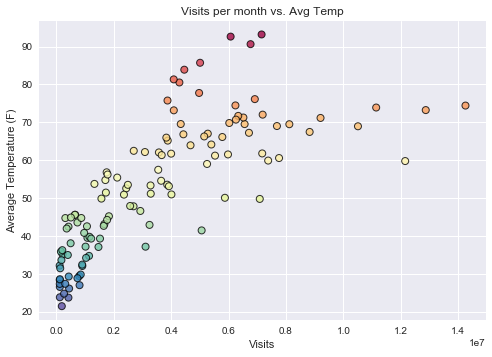

In [58]:
plt.scatter(parks_month_temp["Visits"],
           parks_month_temp["Temp"], c=parks_month_temp["Temp"],
           edgecolor="black", linewidths=1, marker="o",
           cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Visits per month vs. Avg Temp")
plt.ylabel("Average Temperature (F)")
plt.xlabel("Visits")
plt.grid(True)




# Show plot
plt.show()

In [59]:
parks_year_temp = pd.merge(visitors_by_year_df, temp_by_year_df, left_on=["Park", "Year"], right_on=["Park", "Year"], how="outer")

parks_year_temp.to_csv("parks_year_temp.csv", index = False, header = True)
parks_year_temp.reset_index()

,Park,Year,Visits,Temp
0,Acadia National Park,2009,2227698,46.626697
1,Acadia National Park,2010,2504208,49.663598
2,Acadia National Park,2011,2374645,48.132321
3,Acadia National Park,2012,2431052,50.002492
4,Acadia National Park,2013,2254922,48.693269
5,Acadia National Park,2014,2563129,47.872871
6,Acadia National Park,2015,2811184,47.754048
7,Acadia National Park,2016,3303393,49.781216
8,Acadia National Park,2017,3509271,49.033211
9,Acadia National Park,2018,3537575,50.318417


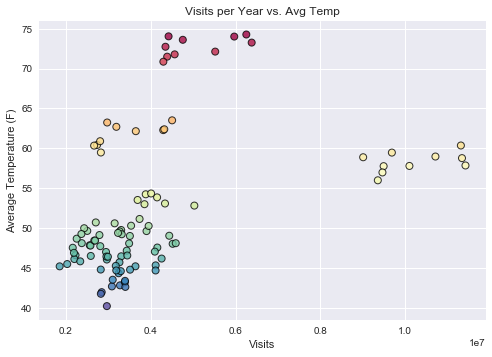

In [61]:
plt.scatter(parks_year_temp["Visits"],
           parks_year_temp["Temp"], c=parks_year_temp["Temp"],
           edgecolor="black", linewidths=1, marker="o",
           cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Visits per Year vs. Avg Temp")
plt.ylabel("Average Temperature (F)")
plt.xlabel("Visits")
plt.grid(True)




# Show plot
plt.show()

In [63]:
grouped_month_allparks = datafile_df.groupby(['Month'])
grouped_year_allparks = datafile_df.groupby(['Year'])

print(grouped_month_allparks)
print(grouped_year_allparks)

grouped_month_allparks.count().head(12)

,Park,Year,Temp,Lat,Lng,Visits
Month,,,,,,
1,100,100,100,100,100,100
2,100,100,100,100,100,100
3,100,100,100,100,100,100
4,100,100,100,100,100,100
5,100,100,100,100,100,100
6,100,100,100,100,100,100
7,100,100,100,100,100,100
8,100,100,100,100,100,100
9,100,100,100,100,100,100


In [64]:
grouped_month_avgvisit = grouped_month_allparks["Visits"].mean()
grouped_month_avgvisit_df = pd.DataFrame(grouped_month_avgvisit)

grouped_month_avgvisit_df.reset_index()

,Month,Visits
0,1,94115.88
1,2,97309.63
2,3,171998.12
3,4,226375.68
4,5,353237.47
5,6,584417.63
6,7,744681.44
7,8,697788.40
8,9,526834.21
9,10,346776.70


In [65]:
grouped_month_avgtemp = grouped_month_allparks["Temp"].mean()
grouped_month_avgtemp_df = pd.DataFrame(grouped_month_avgtemp)

grouped_month_avgtemp_df.reset_index()

,Month,Temp
0,1,34.158258
1,2,35.773916
2,3,43.068493
3,4,49.426390
4,5,57.870042
5,6,68.003820
6,7,74.025407
7,8,72.835779
8,9,66.492930
9,10,53.438894


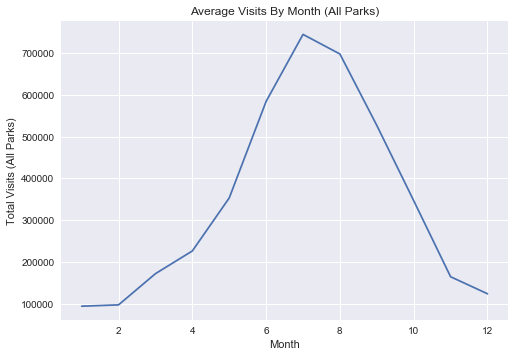

In [79]:
fig, ax = plt.subplots()
ax.plot(grouped_month_avgvisit_df)

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Average Visits By Month (All Parks)")
plt.ylabel("Total Visits (All Parks)")
plt.xlabel("Month")
plt.grid(True)

## Add line best fit!


# Show plot
plt.show()

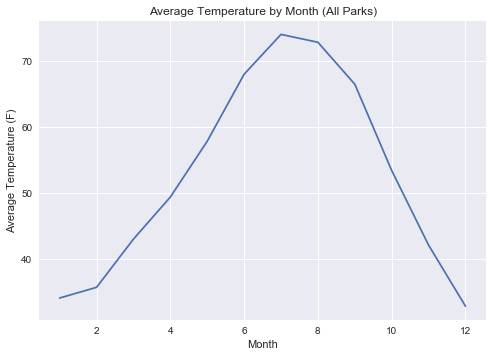

In [78]:
fig, ax = plt.subplots()
ax.plot(grouped_month_avgtemp_df)

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Average Temperature by Month (All Parks)")
plt.ylabel("Average Temperature (F)")
plt.xlabel("Month")
plt.grid(True)

## Add line best fit!


# Show plot
plt.show()